#Task 1:
This dataset includes scores from three test scores of students at a (fictional) public school and a variety of personal and socio-economic factors that may have interaction effects upon them.
Column description:
1.  `Gender`: Gender of the student (male/female)
2.  `EthnicGroup`: Ethnic group of the student (group A to E)
3.  `ParentEduc`: Parent(s) education background (from some_highschool to master's degree)
4.  `LunchType`: School lunch type (standard or free/reduced)
5.  `TestPrep`: Test preparation course followed (completed or none)
6.  `ParentMaritalStatus`: Parent(s) marital status (married/single/widowed/divorced)
7.  `PracticeSport`: How often the student parctice sport (never/sometimes/regularly))
8.  `IsFirstChild`: If the child is first child in the family or not (yes/no)
9.  `NrSiblings`: Number of siblings the student has (0 to 7)
10. `TransportMeans`: Means of transport to school (schoolbus/private)
11. `WklyStudyHours`: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
12. `MathScore`: math test score(0-100)
13. `ReadingScore`: reading test score(0-100)
13. `WritingScore`: writing test score(0-100)

#Read the dataset

In [12]:
import pandas as pd
data = pd.read_csv('Expanded_data_with_more_features_a4b8ecdc-ece4-4b00-a105-46b6ddbf004b.csv')
df = data.copy()

In [13]:
df.sample(5)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
444,470,female,group C,associate's degree,standard,completed,divorced,sometimes,no,1.0,private,5 - 10,83,85,90
18795,991,female,group C,NaN,standard,completed,married,sometimes,yes,3.0,school_bus,< 5,71,77,74
24861,494,male,group B,high school,free/reduced,none,single,sometimes,yes,4.0,school_bus,NaN,62,60,57
505,533,female,group E,associate's degree,standard,completed,married,sometimes,no,4.0,school_bus,5 - 10,79,88,94
13117,919,male,group C,bachelor's degree,standard,completed,NaN,sometimes,no,4.0,private,< 5,89,78,80


#Visualization

In [14]:
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

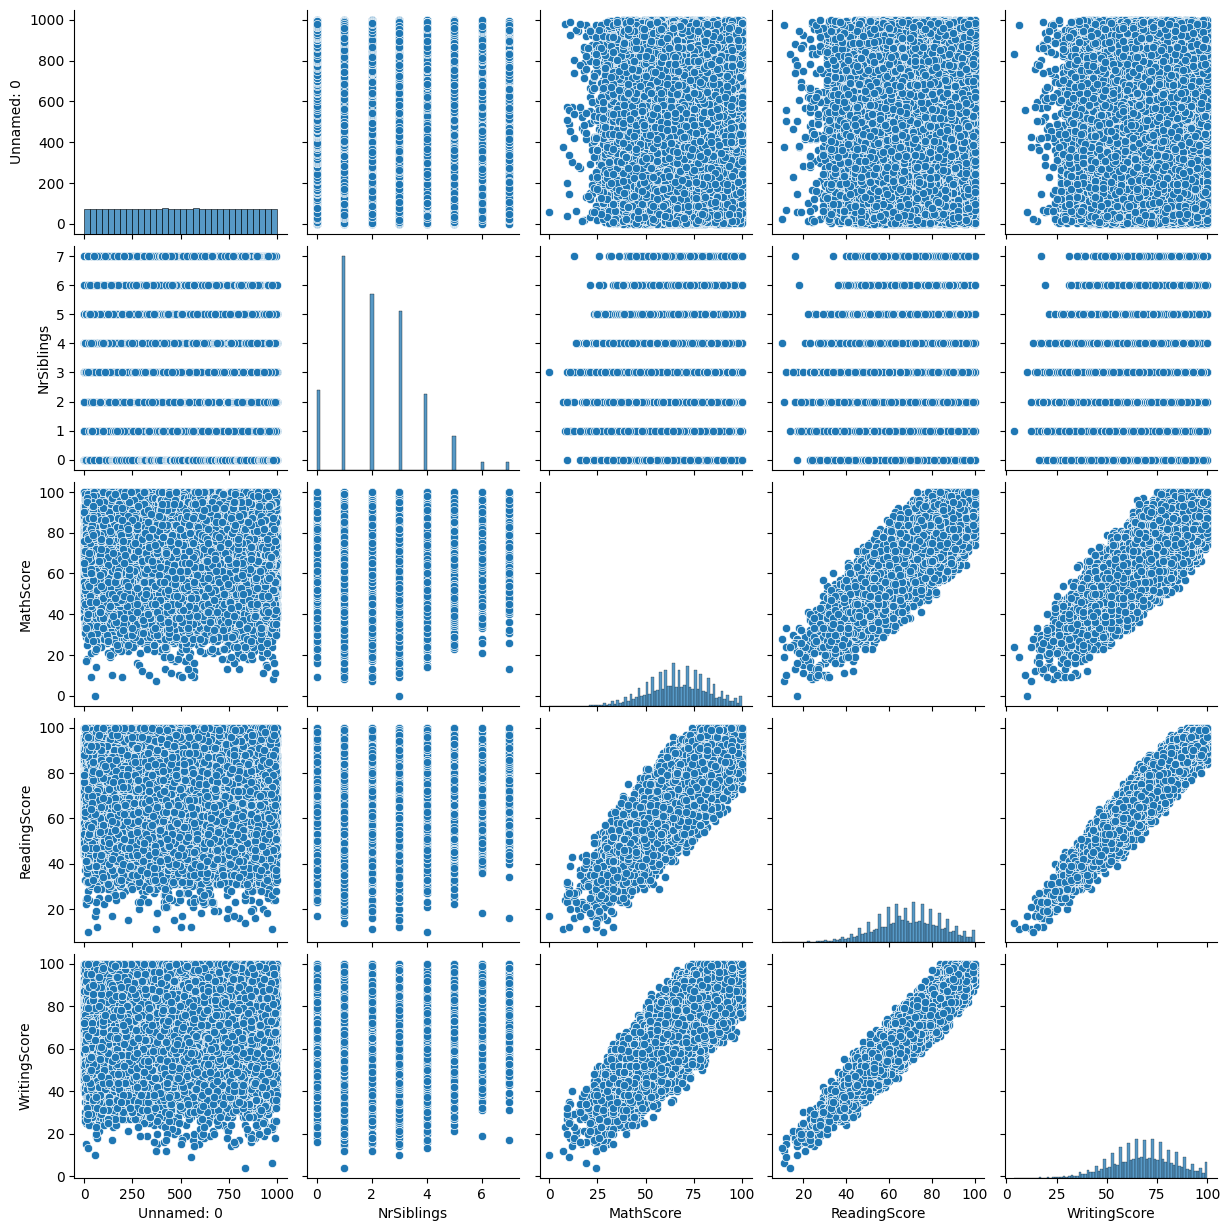

In [4]:
sns.pairplot(df)

#Missing Values & Textual data

In [15]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

<Axes: >

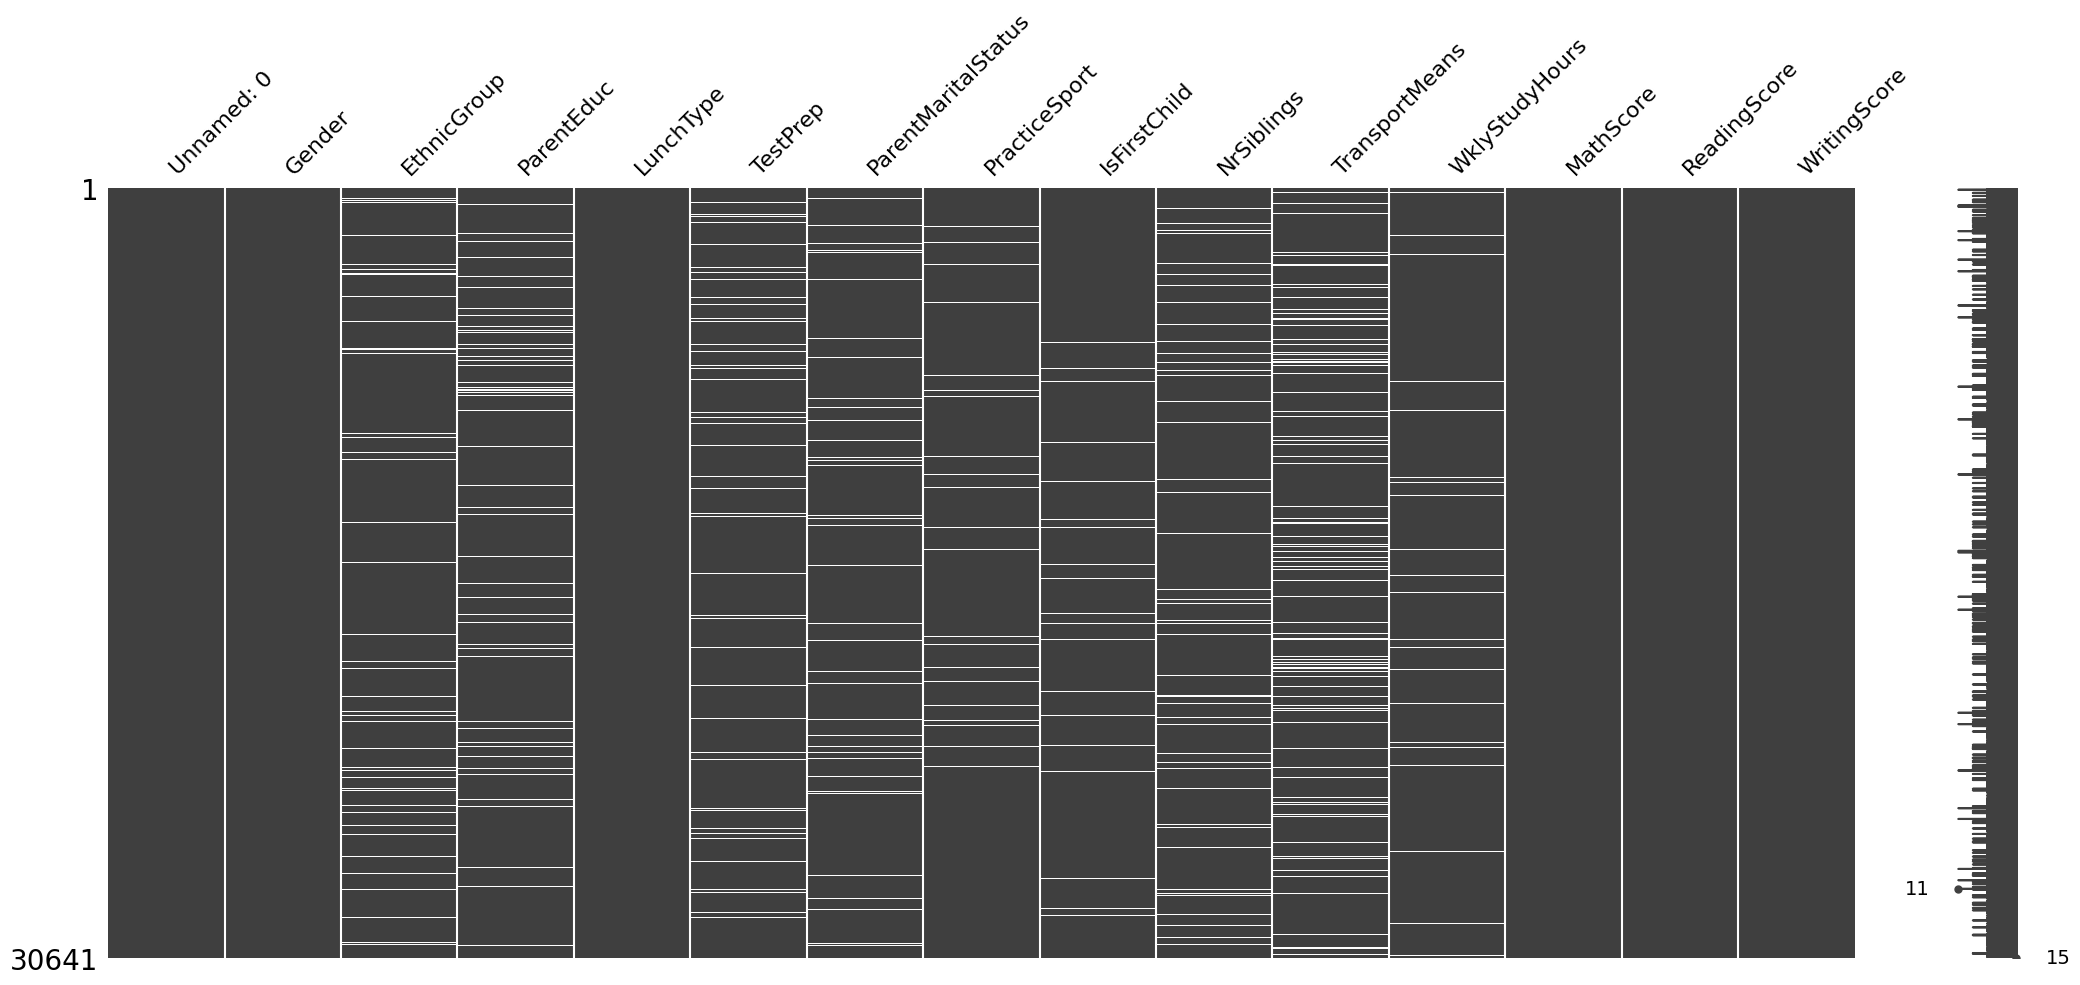

In [16]:
msno.matrix(df)

In [17]:
df = df.drop(columns=['Unnamed: 0'])
df.dropna(subset=['EthnicGroup'], inplace=True)

In [19]:
df.isnull().sum() / len(df) * 100

Gender                  0.000000
EthnicGroup             0.000000
ParentEduc              6.010208
LunchType               0.000000
TestPrep                5.923405
ParentMaritalStatus     3.843617
PracticeSport           2.024235
IsFirstChild            2.958231
NrSiblings              5.103989
TransportMeans         10.232284
WklyStudyHours          3.076282
MathScore               0.000000
ReadingScore            0.000000
WritingScore            0.000000
dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28801 entries, 1 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               28801 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           27070 non-null  object 
 3   LunchType            28801 non-null  object 
 4   TestPrep             27095 non-null  object 
 5   ParentMaritalStatus  27694 non-null  object 
 6   PracticeSport        28218 non-null  object 
 7   IsFirstChild         27949 non-null  object 
 8   NrSiblings           27331 non-null  float64
 9   TransportMeans       25854 non-null  object 
 10  WklyStudyHours       27915 non-null  object 
 11  MathScore            28801 non-null  int64  
 12  ReadingScore         28801 non-null  int64  
 13  WritingScore         28801 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [51]:
def label_data(data: pd.DataFrame, columns: list):
    data_copy = data.copy()
    
    for column in columns:
        encoder = LabelEncoder()
        
        # Temporarily fill NaN values to ensure they don't disrupt the encoder
        data_copy[column] = data_copy[column].astype(str).fillna("nan")
        data_copy[column] = encoder.fit_transform(data_copy[column])
        
        # Restore NaN values in the encoded column
        if "nan" in encoder.classes_:
            nan_class_index = list(encoder.classes_).index("nan")
            data_copy.loc[data_copy[column] == nan_class_index, column] = np.nan
    
    return data_copy

In [52]:
df = label_data(data=df, columns=['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours'])

In [53]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
imputer = IterativeImputer()

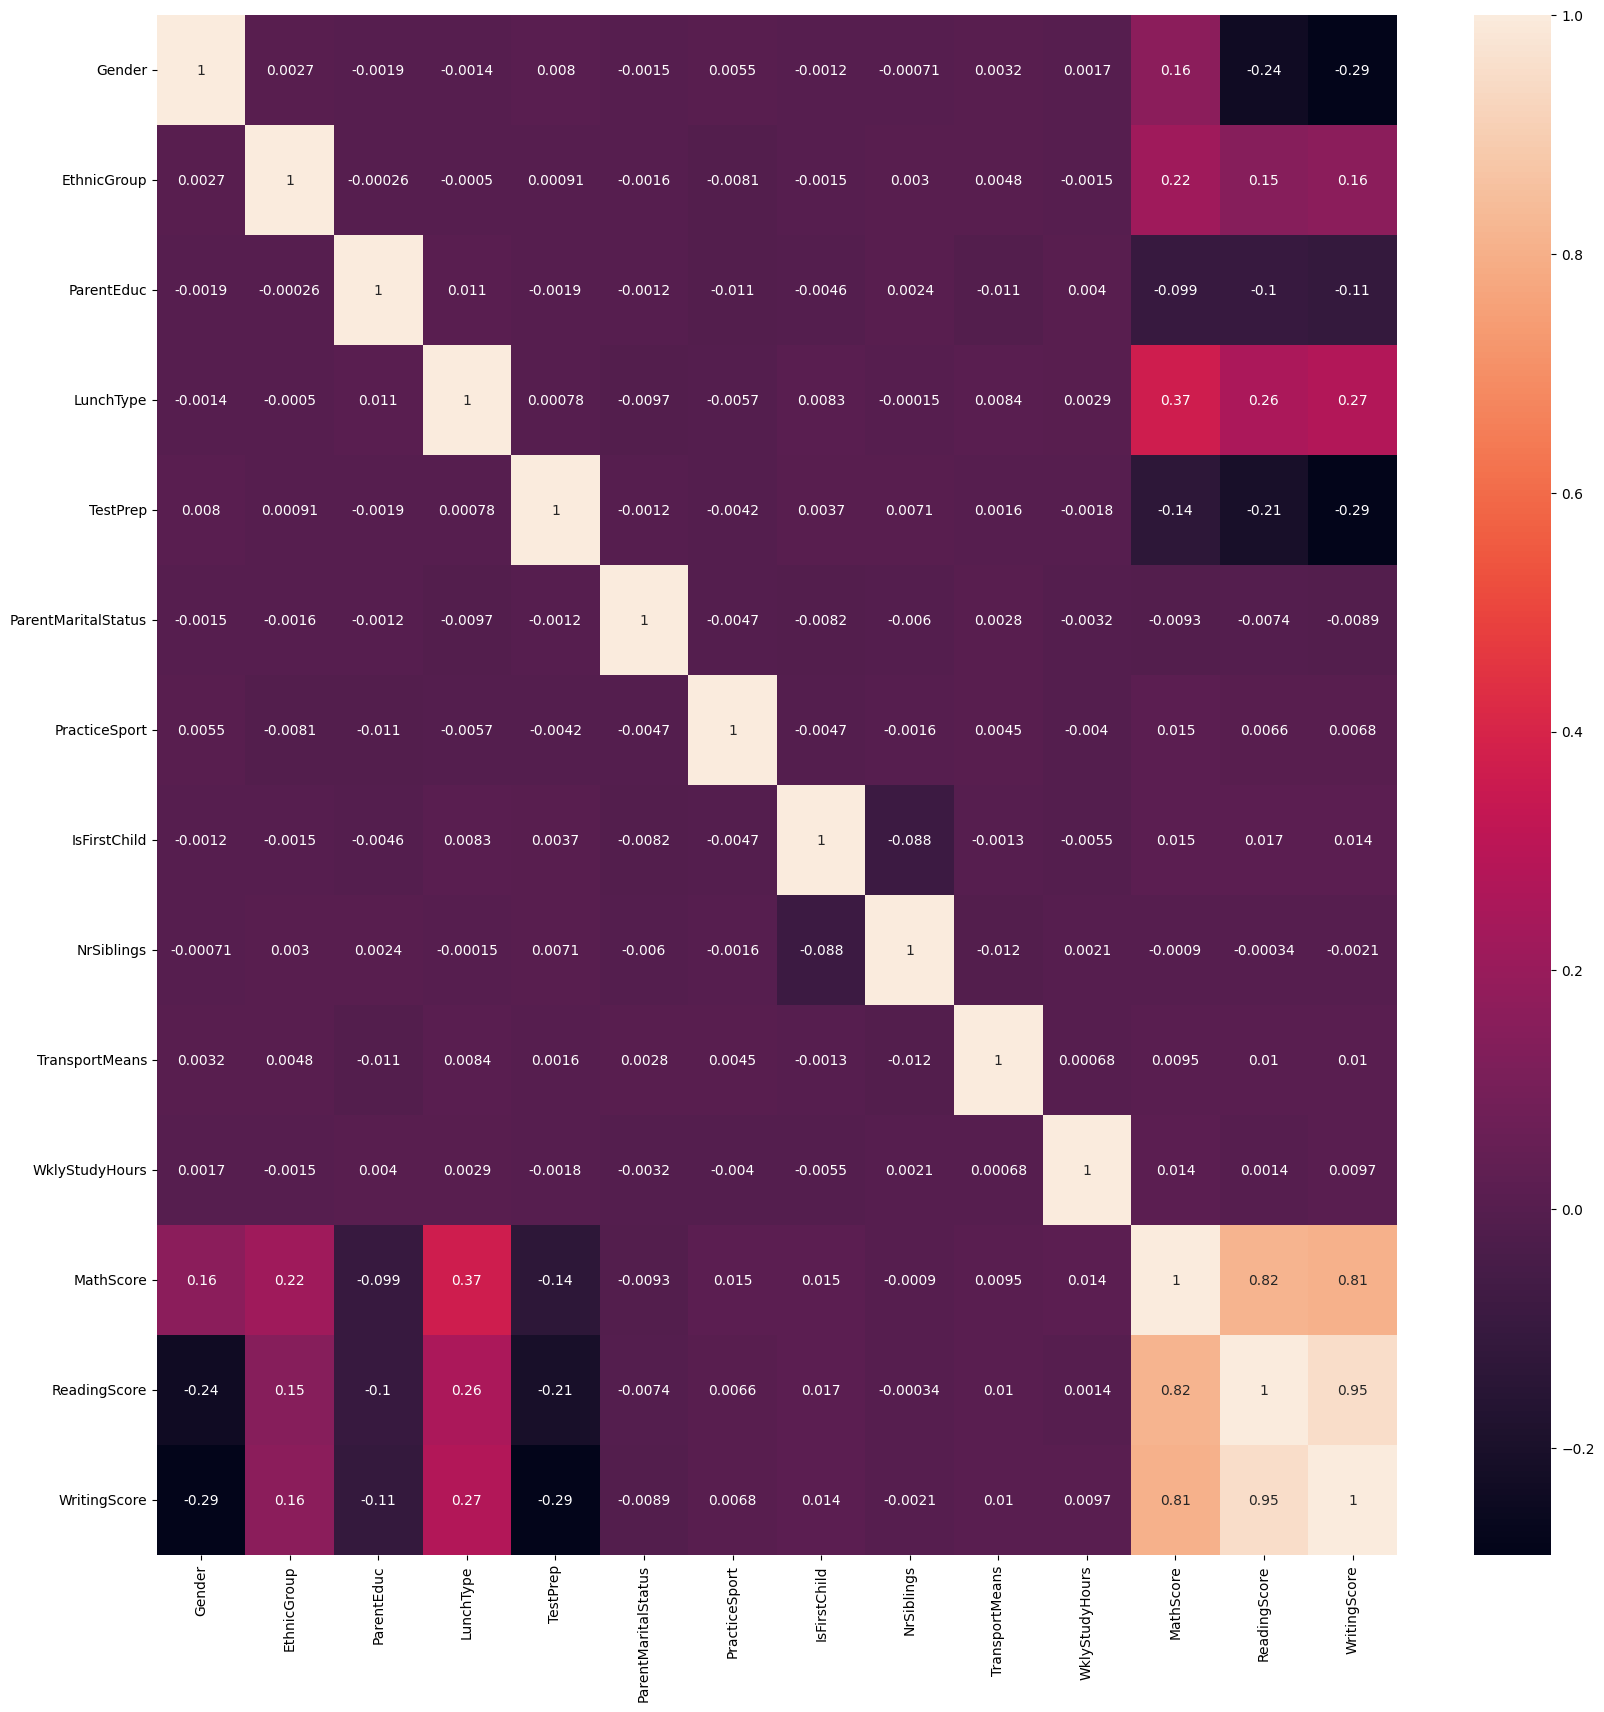

In [54]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [60]:
df.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [59]:
df['NrSiblings'] = imputer.fit_transform(df['NrSiblings'].to_numpy().reshape(-1, 1))

#Train - test split of the dataset (80:20 ratio)

In [62]:
df['EthnicGroup']

1        2
2        1
3        0
4        2
5        1
        ..
30635    2
30636    3
30637    4
30639    3
30640    1
Name: EthnicGroup, Length: 28801, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='EthnicGroup')
Y = df['EthnicGroup']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28801 entries, 1 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               28801 non-null  int64  
 1   EthnicGroup          28801 non-null  int64  
 2   ParentEduc           28801 non-null  int64  
 3   LunchType            28801 non-null  int64  
 4   TestPrep             28801 non-null  int64  
 5   ParentMaritalStatus  28801 non-null  int64  
 6   PracticeSport        28801 non-null  int64  
 7   IsFirstChild         28801 non-null  int64  
 8   NrSiblings           28801 non-null  float64
 9   TransportMeans       28801 non-null  int64  
 10  WklyStudyHours       28801 non-null  int64  
 11  MathScore            28801 non-null  int64  
 12  ReadingScore         28801 non-null  int64  
 13  WritingScore         28801 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 4.3 MB


#Model training (Use KNN, Logistic regression or Linear regression)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

#Model evaluation

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.08      0.08      0.08       413
           1       0.22      0.25      0.24      1169
           2       0.32      0.42      0.36      1801
           3       0.29      0.24      0.26      1517
           4       0.30      0.15      0.20       861

    accuracy                           0.27      5761
   macro avg       0.24      0.23      0.23      5761
weighted avg       0.27      0.27      0.27      5761



In [69]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=50, max_depth=4, learning_rate = 0.0001, objective="multi:softmax", num_class=5)

In [70]:
clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [71]:
Y_pred = clf.predict(X_test)

In [72]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       413
           1       0.26      0.01      0.02      1169
           2       0.33      0.82      0.47      1801
           3       0.32      0.20      0.25      1517
           4       0.53      0.18      0.27       861

    accuracy                           0.34      5761
   macro avg       0.49      0.24      0.20      5761
weighted avg       0.39      0.34      0.26      5761

